In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json
import os
import sys
sys.path.append("../../../")

from src.analysis.tools import compute_f1_score, quadratic_weighted_kappa

def read_csv_from_path(path):
    """
    Reads a CSV file from the given path and returns a pandas DataFrame.

    Args:
        path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the data from the CSV.
    """
    return pd.read_csv(path)

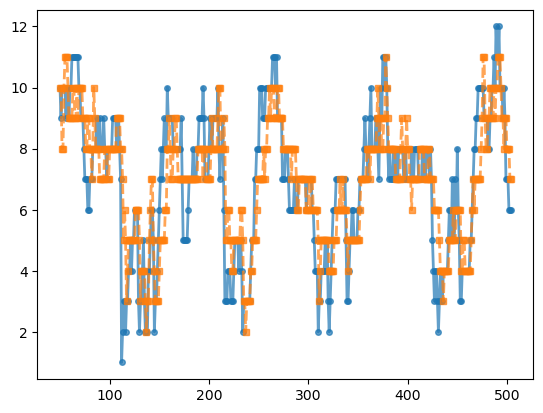

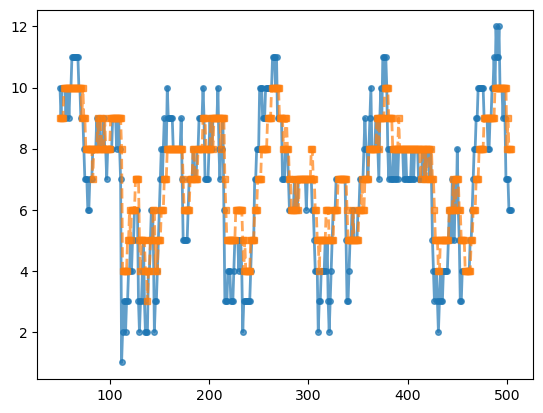

In [88]:
folder = "../../../data/trafficPrediction"
timstamp = "20251112_161359"

# Correct file names: no folders named with data name; files directly in folder, named with base name + .json/.csv
configPath = os.path.join(folder, "config_" + timstamp + ".json")
with open(configPath, "r") as f:
    config = json.load(f)

trafficPath = os.path.join(folder, "traffic_data_" + timstamp + ".csv")
trafficData = read_csv_from_path(trafficPath)
trafficData.head()

idx_start = 50
N_data = 1000
traffic_ground_truth = trafficData['Traffic_Received'][idx_start:idx_start+N_data]
traffic_context_aware = trafficData['Traffic_Predicted_Context_Aware'][idx_start:idx_start+N_data]
traffic_context_free = trafficData['Traffic_Predicted_Context_Free'][idx_start:idx_start+N_data]

plt.plot(traffic_ground_truth, label='Ground Truth', marker='o', linestyle='-', linewidth=2, markersize=4, alpha=0.7)
plt.plot(traffic_context_aware, label='Context Aware', marker='s', linestyle='--', linewidth=2, markersize=4, alpha=0.7)
plt.show()
plt.plot(traffic_ground_truth, label='Ground Truth', marker='o', linestyle='-', linewidth=2, markersize=4, alpha=0.7)
plt.plot(traffic_context_free, label='Context Free', marker='s', linestyle='--', linewidth=2, markersize=4, alpha=0.7)
plt.show()


In [89]:
len_window = config.get("LEN_WINDOW")
print(f"Len Window: {len_window}")

mse_context_aware = np.mean((traffic_context_aware - traffic_ground_truth) ** 2)
mse_context_free = np.mean((traffic_context_free - traffic_ground_truth) ** 2)
print(f"MSE Context Aware: {mse_context_aware}")
print(f"MSE Context Free: {mse_context_free}")

qwk_context_aware = quadratic_weighted_kappa(traffic_context_aware, traffic_ground_truth, len_window+1)
qwk_context_free = quadratic_weighted_kappa(traffic_context_free, traffic_ground_truth, len_window+1)
print(f"QWK Context Aware: {qwk_context_aware}")
print(f"QWK Context Free: {qwk_context_free}")

Len Window: 20
MSE Context Aware: 1.9186813186813187
MSE Context Free: 1.6241758241758242
QWK Context Aware: 0.7872908413410187
QWK Context Free: 0.8090204149484634
